<h1 style="text-align:center;text-decoration:underline;color:#B45F04">TASK 2 : predict the optimum number of clusters using Unsupervised ML</h1>

### As part of Graduate Rotational Internship Program (GRIP) @ The Sparks Foundation 
### Author: Ribin Baby
* Question: <span style="background-color: #FFFF00"> From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. </span>

## import Libraries

In [1]:
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for loading dataset
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading Dataset
iris = datasets.load_iris()
print( dir(iris) )
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Shape of dataset: ", iris_df.shape)
iris_df.head()

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Shape of dataset:  (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# checking for Null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
# checking dtypes of columns
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


* there is no Null values in our dataset
* all columns are of type 'float64'
* there are 4 feature columns

## Descriptive Statistics
* This allow us to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* no noticable variations in the data , further insight should be get only after proper visualizations
* no presence of outliers, not very noticable skewness

## Data Visualization
* 1) A histogram/distribution plot is used to show the shape and distribution of the numerical variable.

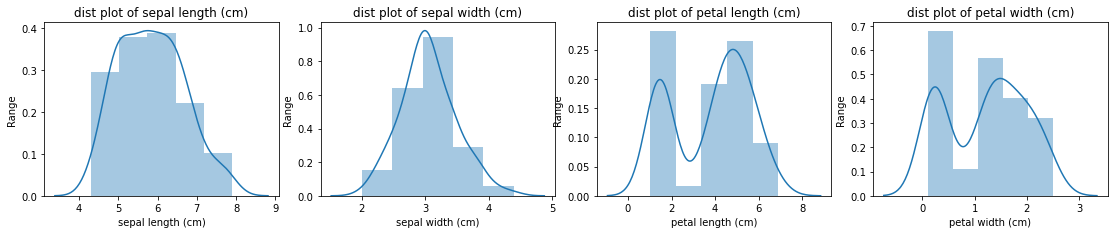

In [6]:
fig, ax = plt.subplots(ncols=len(iris.feature_names), figsize=(15.5,3))
fig.tight_layout(h_pad=4)
palette = sns.color_palette("pastel")

for i, col_name in enumerate(iris.feature_names):
    sns.distplot(iris_df[col_name], ax=ax[i], bins=5)
    ax[i].set_title('dist plot of '+str(col_name))
    ax[i].set_xlabel(col_name)
    ax[i].set_ylabel('Range')
plt.show()

* `sepal width` have a much lower varience, and have higher peak value.
* `sepal length` and `petal length` have a more wider spread.
* the modality of `petal length` and `petal width` is bimodal, gives an indication of prescence of different groups in the data.

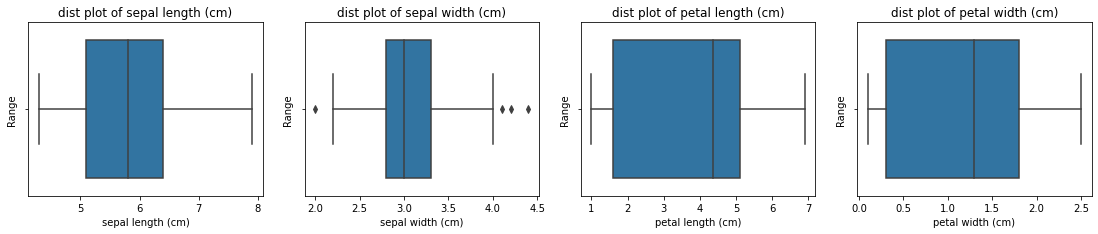

In [7]:
fig, ax = plt.subplots(ncols=len(iris.feature_names), figsize=(15.5,3))
fig.tight_layout(h_pad=4)
palette = sns.color_palette("pastel")

for i, col_name in enumerate(iris.feature_names):
    sns.boxplot(iris_df[col_name], ax=ax[i])
    ax[i].set_title('dist plot of '+str(col_name))
    ax[i].set_xlabel(col_name)
    ax[i].set_ylabel('Range')
plt.show()

* only the `sepal width` have some outiers

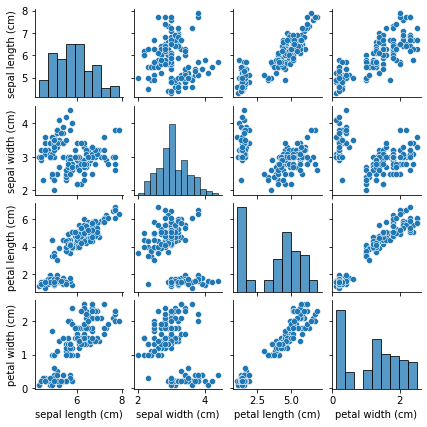

In [8]:
sns.pairplot(iris_df, size=1.5)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

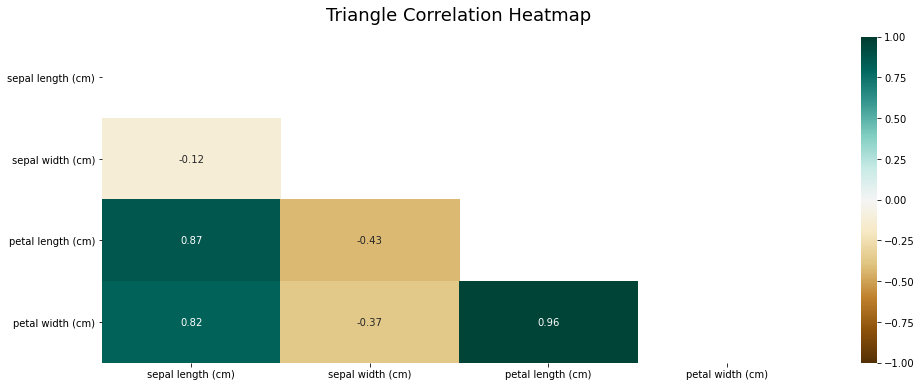

In [9]:
# correlation metrix

plt.figure(figsize=(16, 6))  

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(iris_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(iris_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### Find the optimum number of clusters for K Means
1) using `Elbow method`
* `Elbow method` is a heuristic method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset.
* The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

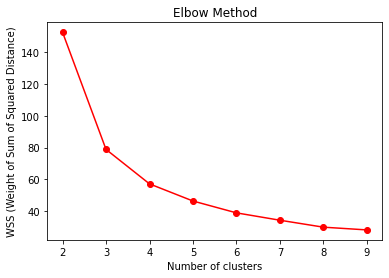

In [10]:
from sklearn.cluster import KMeans

x = iris_df.values # dataset
# Weight of sum of squared distance
WSS = []

k = range(2,10)

for i in k:
    kmeans_ = KMeans(n_clusters=i, random_state=1)
    kmeans_.fit(x)
    WSS.append(kmeans_.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(k, WSS, 'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS (Weight of Sum of Squared Distance)')
plt.show()

* We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3. 

## Modeling classifier
* 1) K Means clustering

In [11]:
n = 3 # no: clustures

kmeans_model = KMeans(n_clusters=n, random_state=1)
y_kmean_pred = kmeans_model.fit_predict(x)

* 2) Gaussian Mixture Model

In [12]:
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=n)
y_gaussian_pred = gaussian_model.fit_predict(x)

## Visualization of clusters

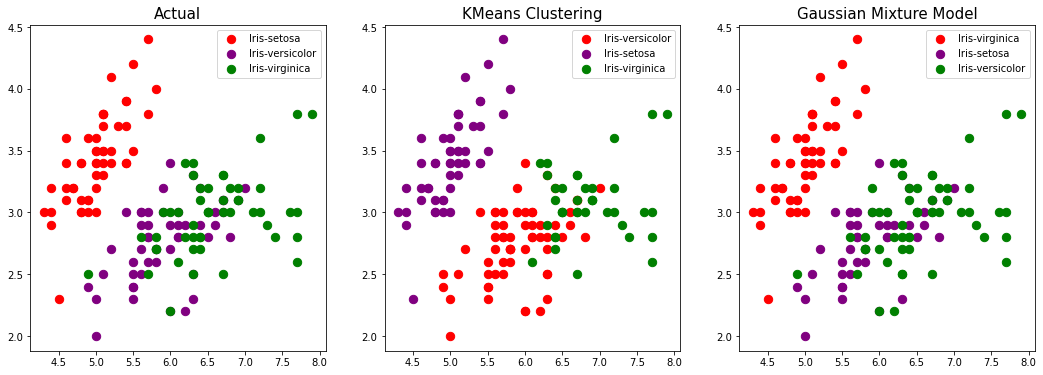

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

def plot_class(axes, i, y_, title:str, labels:list):
    axes[i].scatter(x[y_ == 0,0], x[y_ == 0,1],s=70, c='red', label =labels[0])
    axes[i].scatter(x[y_ == 1,0], x[y_ == 1,1],s=70, c='purple', label =labels[1])
    axes[i].scatter(x[y_ == 2,0], x[y_ == 2,1],s=70, c='green', label =labels[2])
    axes[i].set_title(title, fontsize=15)
    axes[i].legend()
    
plot_class(axes, 0, iris.target, 'Actual', ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plot_class(axes, 1, y_kmean_pred, 'KMeans Clustering', ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'])
plot_class(axes, 2, y_gaussian_pred, 'Gaussian Mixture Model', ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])

* we can obtain a very good clustering using `Gaussian Mixture Model` than `K Means clustering`, because `Gaussian Mixture model can cluster more complex datas`.
* we are able to reproduce the orginal labels almost correctly using unsupervised learning techniques through this task.

<strong><em style='color:#0000FF'>## THE END ##</em></strong>